## Table of contents
### 1. Context
### 2. Imports
### 3. Data Import
### 4. Data Exploration Questions and Graphs

### 1. Context

This [Pima Indeans Diabetes Data](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download) set is taken from Kaggle.com. The goal of this is to take the motivating questions below and use the data to tell a story.

- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities? 
- Can I make a scatterplot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask?

### 2. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 3. Data Import

In [2]:
path = "/Users/MacBookPro-II/Documents/GitHub/Pima Indian Diabetes Prediction/diabetes.csv"
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


What is the range of values for each feature?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(768, 9)

### 4. Data Exploration Questions and Graphs

### How are the variables related to having diabetes?

### Let's look at some pairs of variables and see if there is an obvious correlation between them and having diabetes.

### Let’s first focus on glucose levels since they’re a clear indicator of diabetes

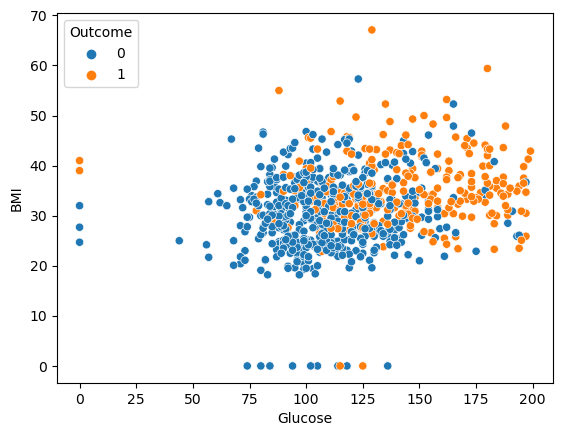

In [10]:
# Glucose and Blood Pressure including diabetes Outcome
sns.scatterplot(x=df.Glucose, y=df.BMI, hue=df.Outcome)

# Show the plot
plt.show()

### It looks like there is a cutoff of Glucose levels, where it’s almost a guarantee that you’ll have diabetes. There's less of a clear distinction with BMI, but I'd like to look at BMI individually to make a better assessment.
---
### Let's take a quick look at BMI. 

<AxesSubplot:xlabel='BMI', ylabel='Count'>

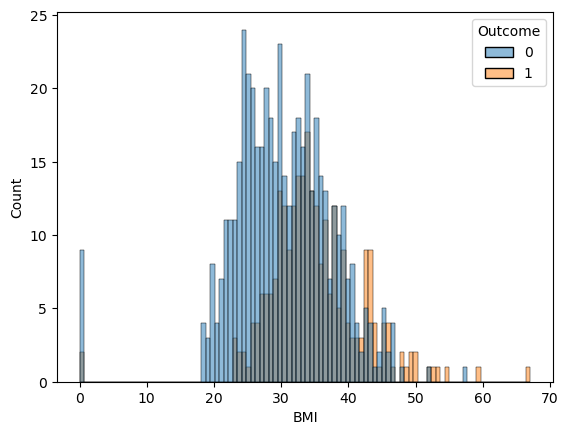

In [11]:
sns.histplot(x=df.BMI, bins = 100, hue=df.Outcome)

#### A quick google seach told me that a BMI between 
#### 18.5-24.9 is healthy 
#### 25.0-29.9 is overweight
#### 30 and above is considered obese.
#### I think the vast morjity of people would be considered overweight-obese.


---

### Let's take a look at Glucose and Blood Pressure

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

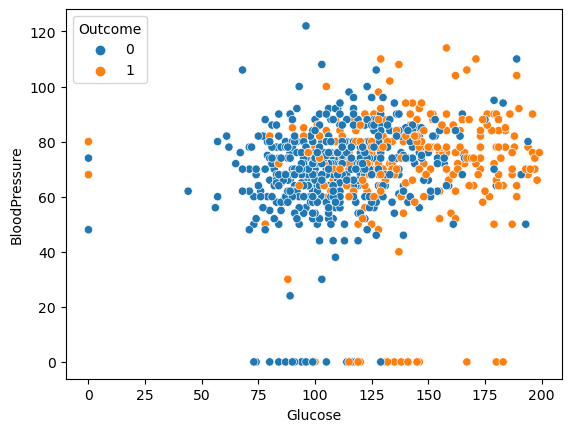

In [12]:
sns.scatterplot(x=df.Glucose, y=df.BloodPressure, hue=df.Outcome)

### Again, it seems like Glucose is a clear indicator, but Blood Pressure is a bit more obscure.
---

### Since insulin is used to regulate the bodies' glucose production. I expect these to be tighty coupled. 

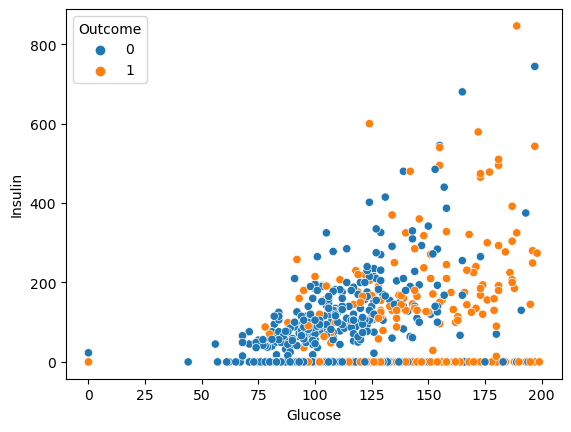

In [13]:
# Glucose and Insulin including diabetes Outcome
sns.scatterplot(x=df.Glucose, y=df.Insulin, hue=df.Outcome)

# Show the plot
plt.show()

### Insulin, strangely doesn't seem to be strongly correlated.
---
### Let's check out BMI and Blood Pressure

<AxesSubplot:xlabel='BloodPressure', ylabel='BMI'>

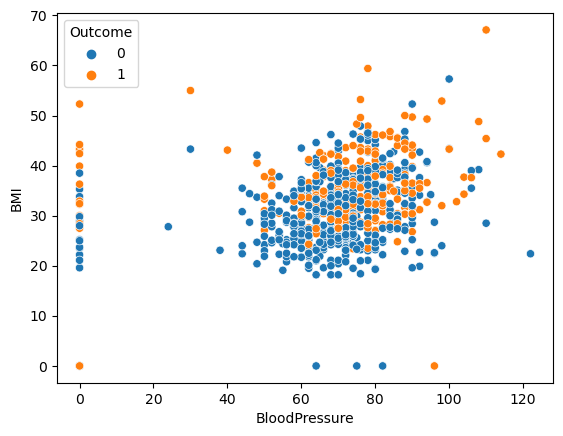

In [14]:
sns.scatterplot(x=df.BloodPressure, y=df.BMI, hue=df.Outcome)

### There is an obvious trend, as BMI goes up, the likelihood of having diabetes also goes up. I can’t see a similar pattern with Blood Pressure.
---
### Let's look at BMI vs Insulin levels

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

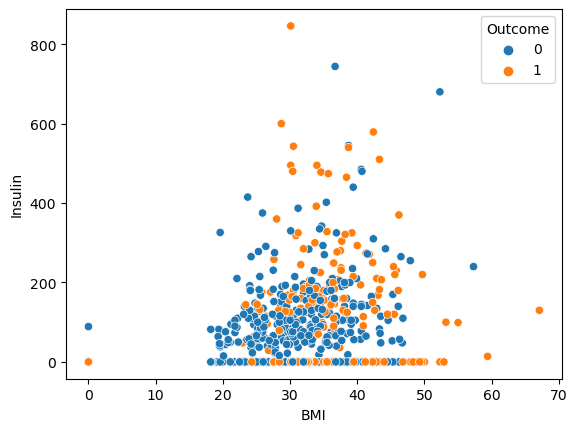

In [15]:
sns.scatterplot(x=df.BMI, y=df.Insulin, hue=df.Outcome)

### There seems to be a lot of Insulin entries missing from our data set.
---
### Let's take a quick look at Blood Pressure and Insulin levels.

<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

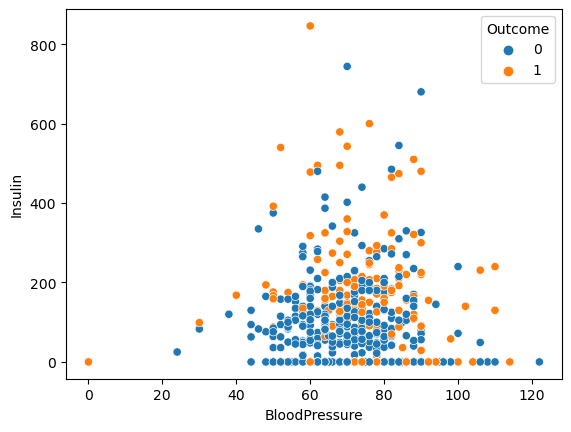

In [16]:
sns.scatterplot(x=df.BloodPressure, y=df.Insulin, hue=df.Outcome)

### Blood Pressure is also difficult to decipher. Let's look at it alone.

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

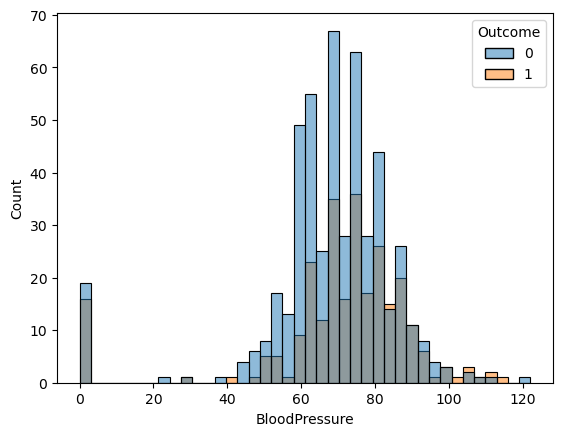

In [17]:
sns.histplot(x=df.BloodPressure, bins = 40, hue=df.Outcome)

### I see how the changes of having diabetes approaches 50/50 as you get past a Blood Pressure
---
### Let's see how Age is effected by all the other variables

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

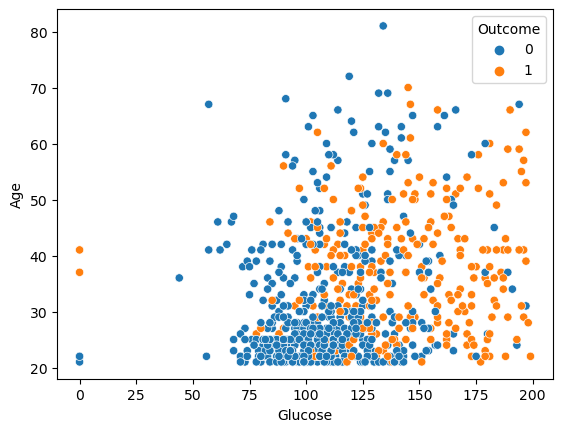

In [18]:
sns.scatterplot(x=df.Glucose, y=df.Age, hue=df.Outcome)

### Glucose appears to be a much more influential factor than Age.
---
### How about BMI?

<AxesSubplot:xlabel='BMI', ylabel='Age'>

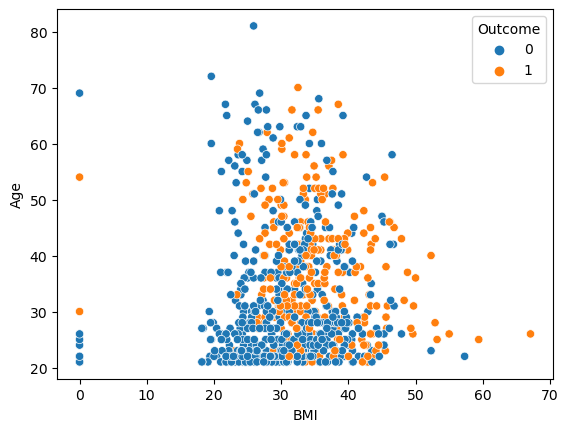

In [19]:
sns.scatterplot(x=df.BMI, y=df.Age, hue=df.Outcome)

### Again, age seems to be less of a factor than BMI.
---
### After taking a look into multiple sets of variables. It looks like it takes a combination off variables to accurately predict if a patient is going to have diabetes or not. 